# LIAR Dataset

_LIAR is a publicly available dataset for fake news detection. A decade-long of 12.8K manually labeled short statements were collected in various contexts from POLITIFACT.COM, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type. The LIAR dataset4 includes 12.8K human labeled short statements from POLITIFACT.COM’s API, and each statement is evaluated by a POLITIFACT.COM editor for its truthfulness._

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Ingestion



In [ ]:
import pandas as pd

In [ ]:
def read_dataframe(tsv_file: str) -> pd.DataFrame:

    # creates a "dataframe" or "df" for short. This is similar to a 2-D python dict.
    df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)

    # replaces all "null" or "NaN" values with an empty string
    df.fillna("", inplace=True)

    df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.

        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.

        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

    return df



In [ ]:
df = read_dataframe('/content/drive/My Drive/Colab Notebooks/SIC/liar_master/train.tsv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 10239 non-null  object
 1   label              10239 non-null  object
 2   statement          10239 non-null  object
 3   subjects           10239 non-null  object
 4   speaker            10239 non-null  object
 5   speaker_job_title  10239 non-null  object
 6   state_info         10239 non-null  object
 7   party_affiliation  10239 non-null  object
 8   count_1            10239 non-null  object
 9   count_2            10239 non-null  object
 10  count_3            10239 non-null  object
 11  count_4            10239 non-null  object
 12  count_5            10239 non-null  object
 13  context            10239 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [ ]:
df.head(10)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece
5,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,,Texas,republican,3,1,1,3,1,a press release.
6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
7,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,,,organization,0,0,1,0,1,a website
8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0,0,0,1,0,an online video
9,7115.json,mostly-true,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1,3,1,3,0,a speech


In [ ]:
def print_row(input_df: pd.DataFrame, index: int) -> None:
    """Most relevant columns for today's analysis"""
    print(f"speaker: {input_df.iat[index, 4]}")
    print(f"subject(s): {input_df.iat[index, 3]}")
    print(f"statement: {input_df.iat[index, 2]}")
    print(f"label: {input_df.iat[index, 1]}")

In [ ]:
print_row(df, 1)

speaker: barack-obama
subject(s): foreign-policy
statement: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
label: mostly-true


In [ ]:
print_row(df, 10000)

speaker: rick-perry
subject(s): income
statement: A part-time Congress with half the pay would still make $38,000 a year more than the average American family.
label: mostly-true


# Exploratory Data Analysis

**Label Distribution & "Truthiness"**

1. **true** – The statement is accurate and there’s nothing significant missing.
2. **mostly-true** – The statement is accurate but needs clarification or additional information.
3. **half-true** – The statement is partially accurate but leaves out important details or takes things out of context.
4. **barely-true** – The statement contains an element of truth but ignores critical facts that would give a different impression.
5. **false** – The statement is not accurate.
6. **pants-fire** – The statement is not accurate and makes a ridiculous claim. a.k.a. "Liar, Liar, Pants on Fire!"


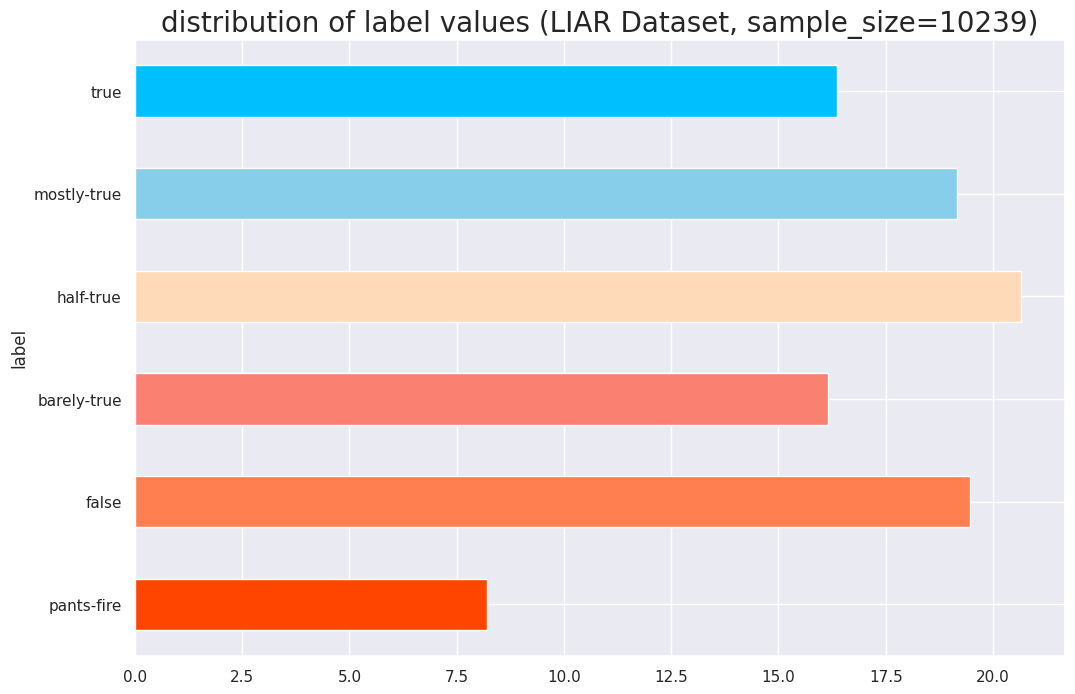

In [ ]:
import seaborn as sns
sns.set()


def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:

    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)

    def multiply_100(x):
        return x * 100

    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)

    # bar chart ordering and  colors for readability.
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered', # pants-fire
        'coral', # false
        'salmon', # barely-true
        'peachpuff', # half-true
        'skyblue', # mostly-true
        'deepskyblue' # true
    ]

    label_frequencies = label_frequencies.reindex(index = labels)


    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(12, 8), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);


# create bar chart over labels for the entire LIAR dataset.
label_bar_chart(df)

<br />

## Speaker Analysis
Let's take a look at the speaker column now. In order for this data to be super useful, we want a large breadth of speakers. Otherwise, the dataset might be too narrow for general applicability. It might also be nice to look at label distribution for a given speaker.

`pandas` has a lot of builtin methods to help slice and dice datasets. `pandas.Series.nunique()` gives us the number of unique values for a column. We can treat `pandas.DataFrame` like a list and call `len(df)` to get the total number of rows.


In [ ]:
num_unique_speakers = df['speaker'].nunique()
avg_statments = len(df) / num_unique_speakers

print(f"Unique speakers in dataset: {num_unique_speakers}")
print(f"Average statements made per speaker: {avg_statments}")

Unique speakers in dataset: 2910
Average statements made per speaker: 3.5185567010309278


In [ ]:
def speaker_bar_chart(input_df: pd.DataFrame, speaker: str) -> pd.DataFrame:

    # filters the input_df
    speaker_df = input_df[ input_df['speaker'] == speaker ]
    speaker_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(speaker_df, title=speaker)

    return speaker_df


In [ ]:
# 'barack-obama', 'bernie-s', 'mitt-romney', 'hillary-clinton', 'tom-cotton', 'north-korea', 'donald-trump', 'joe-biden', 'mitch-mcconnell'
list(df['speaker'].unique())

['scott-surovell',
 'barack-obama',
 'blog-posting',
 'charlie-crist',
 'robin-vos',
 'republican-party-texas',
 'oregon-lottery',
 'duey-stroebel',
 'robert-menendez',
 'bernie-s',
 'mitt-romney',
 'doonesbury',
 'george-will',
 'national-republican-congressional-committee',
 'gwen-moore',
 'jack-lew',
 'dennis-richardson',
 'eric-bolling',
 'hillary-clinton',
 'greater-wisconsin-political-fund',
 'planned-parenthood-action-fund',
 'nancy-pelosi',
 'ted-nugent',
 'pamela-geller',
 'peter-kinder',
 'nicholas-kettle',
 'shelley-moore-capito',
 'rick-scott',
 'tom-cotton',
 'ted-cruz',
 'lee-leffingwell',
 'north-korea',
 'walking-dead',
 'kelly-ayotte',
 'marco-rubio',
 'keep-promise-1-pac',
 'rachel-maddow',
 'jerry-patterson',
 'chain-email',
 'john-boehner',
 'katrina-pierson',
 'rick-perry',
 'national-republican-senatorial-committee',
 'ken-cuccinelli',
 'andrew-cuomo',
 'sid-miller',
 'jim-barksdale',
 'david-raynor',
 'donald-trump',
 'john-mccain',
 'battleground-texas',
 'miche

,index,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
1,6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
2,15,620.json,true,McCain opposed a requirement that the governme...,federal-budget,barack-obama,President,Illinois,democrat,70,71,160,163,9,a radio ad
3,73,10039.json,mostly-true,The cost of health care is now the single-bigg...,"deficit,federal-budget,health-care",barack-obama,President,Illinois,democrat,70,71,160,163,9,a speech at Northwestern University
4,104,338.json,true,Sen. Obama has always had a 100 percent procho...,abortion,barack-obama,President,Illinois,democrat,70,71,160,163,9,an e-mail message sent to voters before Super ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,10136,6423.json,half-true,Says Mitt Romney paid only 14 percent in taxes...,"candidates-biography,message-machine-2012,taxes",barack-obama,President,Illinois,democrat,70,71,160,163,9,a campaign ad
484,10157,1094.json,half-true,"The stimulus ""has delivered $43 billion in tax...","economy,stimulus,taxes",barack-obama,President,Illinois,democrat,70,71,160,163,9,his weekly radio address
485,10180,625.json,barely-true,John McCain worries about nuclear waste in Ari...,energy,barack-obama,President,Illinois,democrat,70,71,160,163,9,a television ad
486,10191,612.json,false,John McCain refuses to support a new bipartisa...,energy,barack-obama,President,Illinois,democrat,70,71,160,163,9,a news release


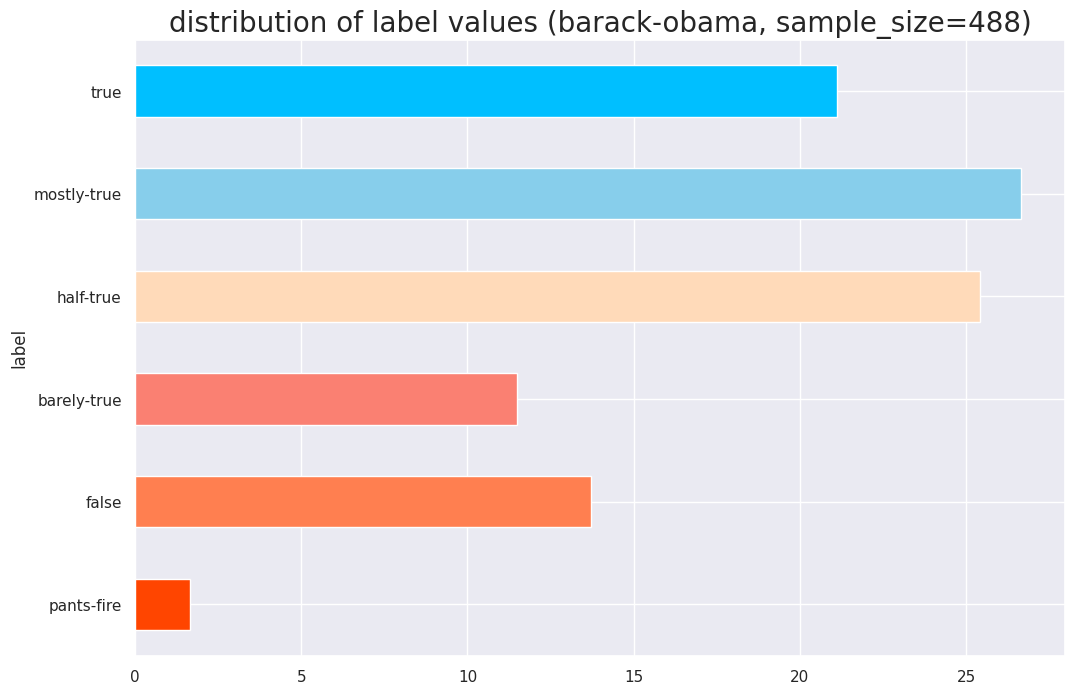

In [ ]:
speaker_bar_chart(df, 'barack-obama')

,index,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,56,12981.json,barely-true,"They were going to build the wall a while ago,...",immigration,donald-trump,President-Elect,New York,republican,63,114,51,37,61,an interview on Fox News
1,66,12056.json,false,Says the man who rushed the stage at him in Da...,"civil-rights,elections,terrorism",donald-trump,President-Elect,New York,republican,63,114,51,37,61,"an interview on ""Meet the Press"""
2,103,13142.json,false,NATO is opening up a major terror division. .....,"foreign-policy,military,terrorism",donald-trump,President-Elect,New York,republican,63,114,51,37,61,a presidential debate at Hofstra University
3,148,11536.json,barely-true,"On the VA: Over 300,000 veterans have died wai...","health-care,veterans",donald-trump,President-Elect,New York,republican,63,114,51,37,61,a speech.
4,246,13026.json,barely-true,Says Hillary Clinton said the Veterans Affairs...,veterans,donald-trump,President-Elect,New York,republican,63,114,51,37,61,the NBC Commander-In-Chief Forum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,10050,11382.json,false,"Among Syrian refugees, there arent that many w...","foreign-policy,immigration",donald-trump,President-Elect,New York,republican,63,114,51,37,61,"an interview on ABC ""This Week"""
269,10156,11818.json,false,I never once asked that (Megyn Kelly) be remov...,"candidates-biography,debates",donald-trump,President-Elect,New York,republican,63,114,51,37,61,an interview on CNN
270,10164,12744.json,mostly-true,"While Hillary Clinton plans a massive, and I m...",taxes,donald-trump,President-Elect,New York,republican,63,114,51,37,61,his acceptance speech at the Republican Natiio...
271,10179,12757.json,mostly-true,"Nearly 180,000 illegal immigrants with crimina...",immigration,donald-trump,President-Elect,New York,republican,63,114,51,37,61,in a speech at the Republican convention


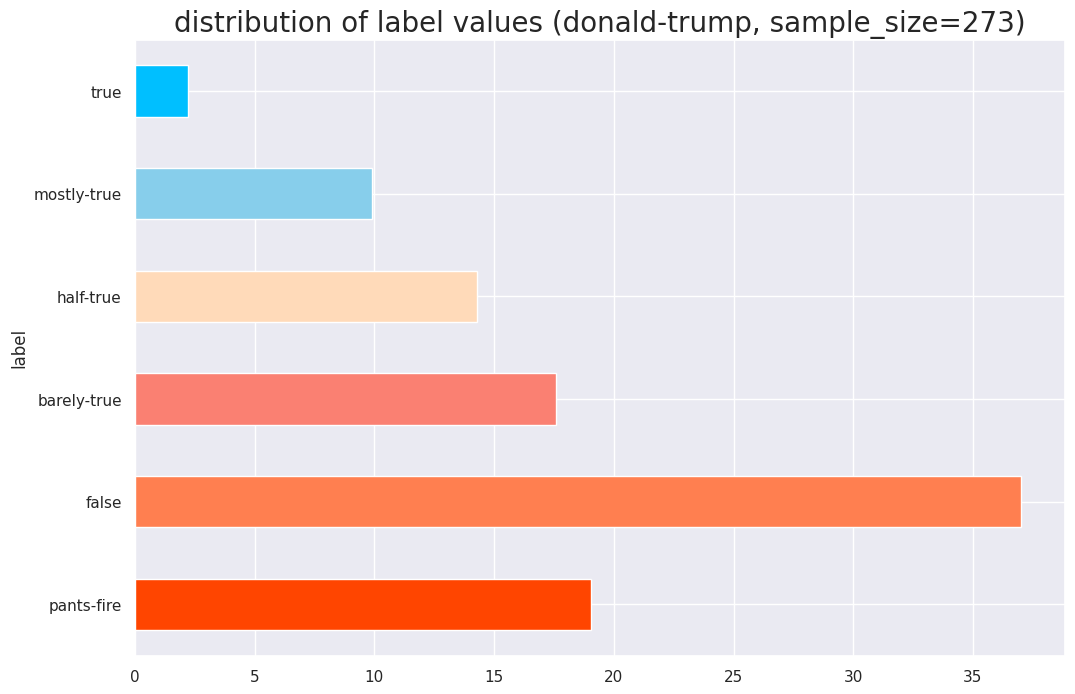

In [ ]:
speaker_bar_chart(df, 'donald-trump')

In [ ]:
# ret_df[ ret_df['label'] == 'pants-fire' ]
# ret_df

,index,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
1,6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
2,15,620.json,true,McCain opposed a requirement that the governme...,federal-budget,barack-obama,President,Illinois,democrat,70,71,160,163,9,a radio ad
3,73,10039.json,mostly-true,The cost of health care is now the single-bigg...,"deficit,federal-budget,health-care",barack-obama,President,Illinois,democrat,70,71,160,163,9,a speech at Northwestern University
4,104,338.json,true,Sen. Obama has always had a 100 percent procho...,abortion,barack-obama,President,Illinois,democrat,70,71,160,163,9,an e-mail message sent to voters before Super ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,10136,6423.json,half-true,Says Mitt Romney paid only 14 percent in taxes...,"candidates-biography,message-machine-2012,taxes",barack-obama,President,Illinois,democrat,70,71,160,163,9,a campaign ad
484,10157,1094.json,half-true,"The stimulus ""has delivered $43 billion in tax...","economy,stimulus,taxes",barack-obama,President,Illinois,democrat,70,71,160,163,9,his weekly radio address
485,10180,625.json,barely-true,John McCain worries about nuclear waste in Ari...,energy,barack-obama,President,Illinois,democrat,70,71,160,163,9,a television ad
486,10191,612.json,false,John McCain refuses to support a new bipartisa...,energy,barack-obama,President,Illinois,democrat,70,71,160,163,9,a news release


In [ ]:
# print_row(ret_df, 0)

<br />

## Subject Analysis
Let's do for subjects what we did for speakers. Our `label_bar_chart` function doesn't care how the input data is sliced (as long as it has a "labels" column!), so we can re-use that here.

**Note**: There can be multiple subjects per row of data, so we'll need to account for that. We need to _transform_ our dataset, using `pandas`, in order to feed it into `label_bar_chart`.


Handling columns of data that have multiple values is such a common operation in data analysis that there is a builtin function for this: `pandas.DataFrame.explode`!

In [ ]:
# this creates a new dataframe that only contains the label and subjects columns.
subject_df = df[['label', 'subjects']].copy()

# # start by turning the comma-separated values into a list of values
def csv_to_list(x):
    return x.split(",")

subject_df['subjects'] = subject_df['subjects'].apply(csv_to_list)

subject_df = subject_df.explode('subjects')

subject_df.head()

,label,subjects
0,half-true,energy
0,half-true,history
0,half-true,job-accomplishments
1,mostly-true,foreign-policy
2,false,health-care


Now we can perform the same analysis on the subject column,

In [ ]:
num_unique_subjects = subject_df['subjects'].nunique()

print(f"Unique subjects in dataset: {num_unique_subjects}")

In [ ]:
# 'energy', 'poverty', 'taxes', 'climate-change', 'obama-birth-certificate'
list(subject_df['subjects'].unique())

['energy',
 'history',
 'job-accomplishments',
 'foreign-policy',
 'health-care',
 'economy',
 'jobs',
 'education',
 'candidates-biography',
 'ethics',
 'message-machine-2014',
 'voting-record',
 'elections',
 'new-hampshire-2012',
 'poverty',
 'state-budget',
 'federal-budget',
 'financial-regulation',
 'water',
 'bankruptcy',
 'population',
 'income',
 'corporations',
 'taxes',
 'message-machine',
 'abortion',
 'crime',
 'diversity',
 'homeland-security',
 'terrorism',
 'technology',
 'campaign-advertising',
 'labor',
 'states',
 'unions',
 'workers',
 'climate-change',
 'environment',
 'government-regulation',
 'small-business',
 'bipartisanship',
 'consumer-safety',
 'corrections-and-updates',
 'market-regulation',
 'supreme-court',
 'city-government',
 'military',
 'pop-culture',
 'debt',
 'legal-issues',
 'stimulus',
 'pundits',
 'women',
 'immigration',
 'deficit',
 'iraq',
 'patriotism',
 'campaign-finance',
 'gays-and-lesbians',
 'kagan-nomination',
 'criminal-justice',
 'sex

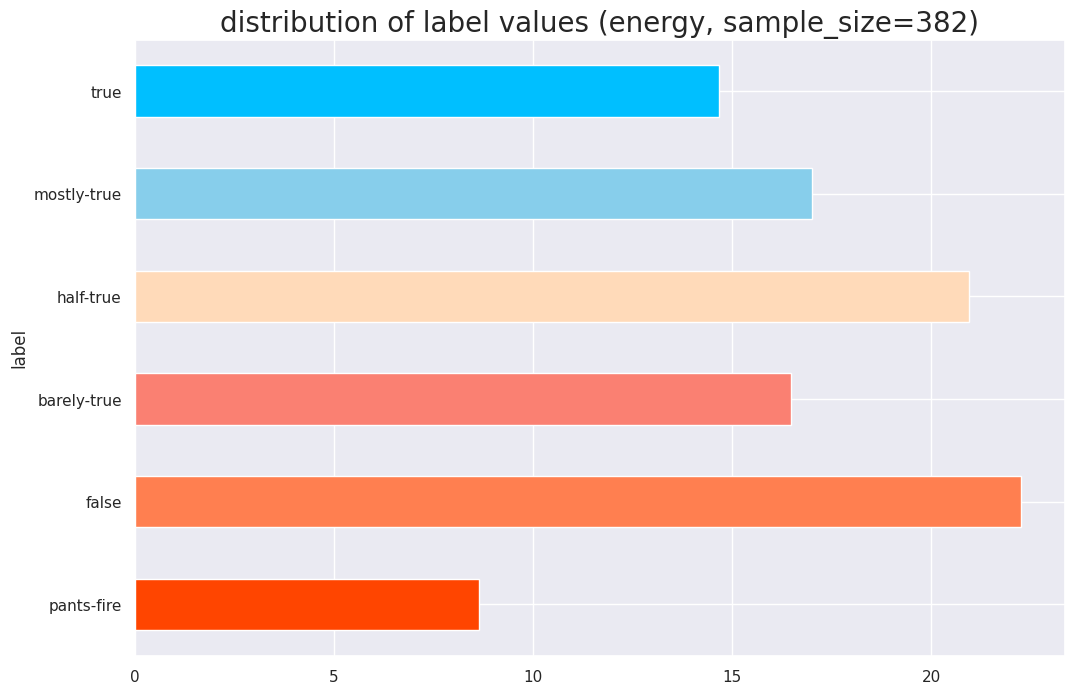

In [ ]:
def subject_bar_chart(input_df: pd.DataFrame, subject: str) -> pd.DataFrame:

    # filters the input_df
    ret_df = input_df[ input_df['subjects'] == subject ]
    ret_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(ret_df, title=subject)

    return ret_df


# create a bar chart over labels for a single subject. Store the returned dataframe to a variable.
ret_df = subject_bar_chart(subject_df, 'energy')